In [1]:
from zlib import crc32
import os
import requests
import tarfile
import pandas as pd
import numpy as np
import hashlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
plt.style.use("dark_background")
%matplotlib inline

In [2]:
def download_dataset():
    url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz"
    filename = url.split("/")[-1]
    
    # Download california housing price dataset
    if not os.path.isfile(filename):
        response = requests.get(url)
        with open(filename, "wb") as file:
            for chunk in response.iter_content(chunk_size=8 * 1024):
                file.write(chunk)
    
    # Extract california housing price dataset
    if os.path.isfile(filename):
        with tarfile.open(filename) as file:
            file.extractall()
        
    print("Download and extracted")
download_dataset()

Download and extracted


In [3]:
housing = pd.read_csv("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# housing["ocean_proximity"].unique()
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
mapping = {"ISLAND": 0, "NEAR BAY": 1, "NEAR OCEAN": 2, "<1H OCEAN": 3, "INLAND": 4}
housing.replace({"ocean_proximity": mapping}, inplace=True)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1


In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,2.965988
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,0.943948
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,3.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,3.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,4.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


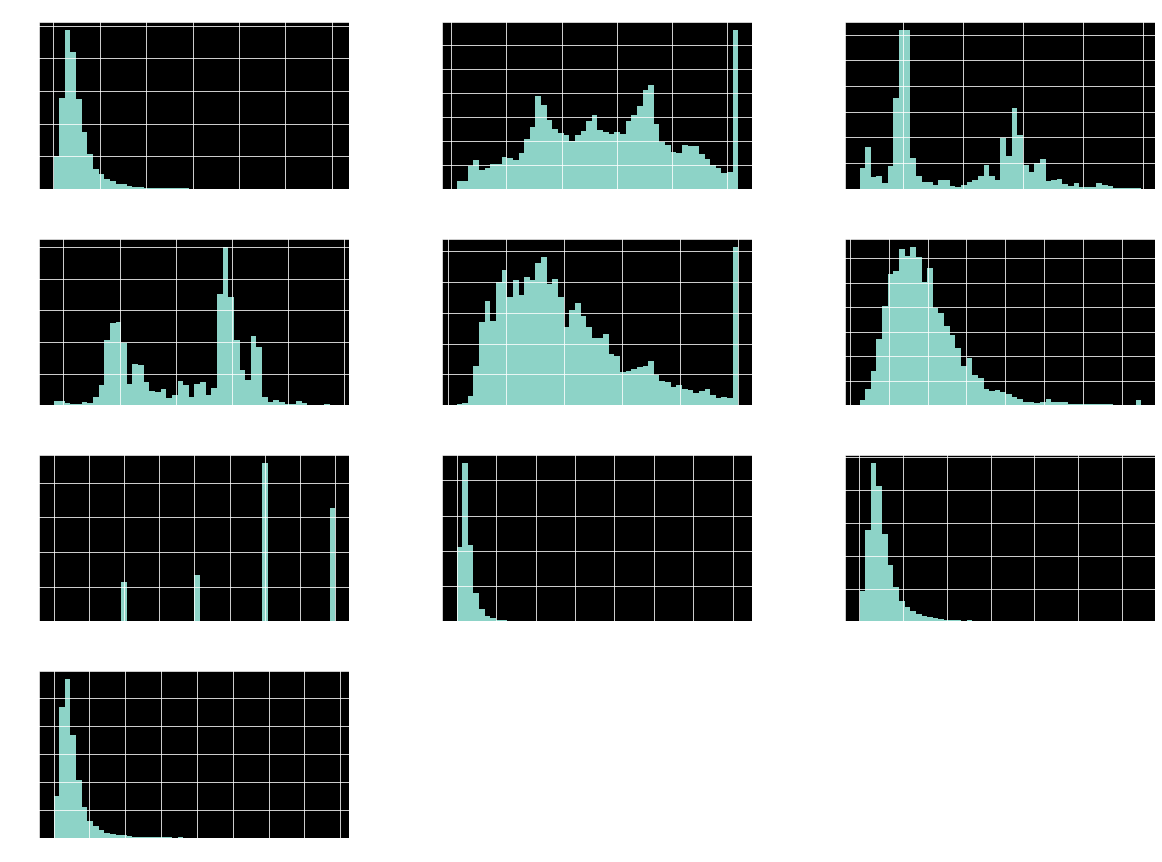

In [8]:
housing.hist(bins=50, figsize=(20, 15))
plt.show()

In [9]:
np.random.seed(42)

def split_train_test(dataset, test_ratio=0.1):
    len_dataset = len(dataset)
    
    shuffled_indices = np.random.permutation(len_dataset)
    
    test_dataset_size = int(len_dataset * test_ratio)
    
    test_indices = shuffled_indices[:test_dataset_size]  # 0 ~ specific num
    train_indices = shuffled_indices[test_dataset_size:] # specific num ~ end
    
    train_dataset = dataset.iloc[train_indices]
    test_dataset = dataset.iloc[test_indices]
    
    return train_dataset, test_dataset

In [10]:
train_set, test_set = split_train_test(housing, test_ratio=0.2)
print(len(train_set))
print(len(test_set))

16512
4128


In [11]:
def test_set_check(identifier, test_ratio=0.1):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2 ** 32

def split_train_test_by_id(data, id_column, test_ratio=0.1):
    ids = data[id_column]
    in_test_set  = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [12]:
housing_with_id = housing.reset_index()
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1


In [13]:
def test_set_check(identifier, test_ratio, hash_lib=hashlib.md5):
    return bytearray(hash_lib(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [15]:
train_set, test_set = split_train_test_by_id(housing_with_id, id_column='index', test_ratio=0.1)

In [ ]:
train_set, test_set = train_test_split(housing_with_id, test_size=0.2, random_state=42)